In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gzip, cPickle

from collections import namedtuple

In [3]:
files = glob.glob('../results/a4-Apr2/e*') 

In [4]:
files, len(files)

(['../results/a4-Apr2/errors57.pkl.gz',
  '../results/a4-Apr2/errors76.pkl.gz',
  '../results/a4-Apr2/errors67.pkl.gz',
  '../results/a4-Apr2/errors51.pkl.gz',
  '../results/a4-Apr2/errors99.pkl.gz',
  '../results/a4-Apr2/errors81.pkl.gz',
  '../results/a4-Apr2/errors6.pkl.gz',
  '../results/a4-Apr2/errors0.pkl.gz',
  '../results/a4-Apr2/errors2.pkl.gz',
  '../results/a4-Apr2/errors4.pkl.gz',
  '../results/a4-Apr2/errors8.pkl.gz',
  '../results/a4-Apr2/errors1.pkl.gz',
  '../results/a4-Apr2/errors12.pkl.gz',
  '../results/a4-Apr2/errors3.pkl.gz',
  '../results/a4-Apr2/errors9.pkl.gz',
  '../results/a4-Apr2/errors5.pkl.gz',
  '../results/a4-Apr2/errors10.pkl.gz',
  '../results/a4-Apr2/errors14.pkl.gz',
  '../results/a4-Apr2/errors16.pkl.gz',
  '../results/a4-Apr2/errors13.pkl.gz',
  '../results/a4-Apr2/errors7.pkl.gz',
  '../results/a4-Apr2/errors11.pkl.gz',
  '../results/a4-Apr2/errors18.pkl.gz',
  '../results/a4-Apr2/errors15.pkl.gz',
  '../results/a4-Apr2/errors22.pkl.gz',
  '../resu

In [5]:
ex_list = []
for filename in files:
    ex = []
    ex.append(filename)
    with gzip.open(filename, "r") as f:
        with gzip.open(filename.replace('errors', 'params'), 'r') as f_param:
            errors = cPickle.load(f)
            params = cPickle.load(f_param)
            ex.extend(errors)
            ex.extend(params)
        
    ex_list.append(ex)

In [6]:
for ex in ex_list:
    if np.isnan(ex[6]):
        ex[6] = 0.005
        ex[7] = 0.005
        ex[8] = 0.005
        ex[9] = 0.005

In [7]:
list(enumerate(ex_list[0]))

[(0, '../results/a4-Apr2/errors57.pkl.gz'),
 (1, array([  5.30434947e-04,   6.01725653e-02,   2.46538268e-03,
           5.56297426e-04,   3.94097733e-04,   3.30208044e-04,
           2.67450232e-04,   1.95481960e-04,   1.48373903e-04,
           1.15024188e-04,   4.29871589e-01,   1.50557855e-04])),
 (2, array([  1.88257696e+08,   3.49430025e-01,   8.13791994e-03,
           1.11200684e-03,   6.43849198e-04,   5.23971161e-04,
           3.88429267e-04,   3.31881136e-04,   3.01447493e-04,
           2.95203092e-04,   3.42294526e+00,   2.14276602e-03])),
 (3, 57.180602073669434),
 (4, 0.00013740372),
 (5, 0.002142766),
 (6, 0.0022236612),
 (7, 0.013196986),
 (8, 0.00021317099),
 (9, 0.0029741412),
 (10, 11969),
 (11, 1.1038088926188083e-10),
 (12, [0.99931442218393651, 0.99056431776820786]),
 (13, 0.7199393957757809),
 (14, 0.12044706753631425),
 (15, ['relu', 'relu'])]

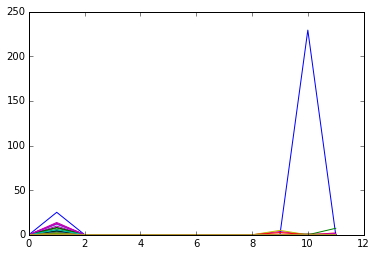

In [8]:
for i, ex in enumerate(ex_list):
    plt.plot(ex[1], label=str(i))

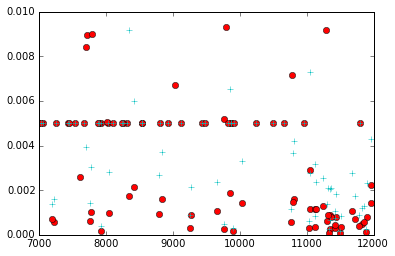

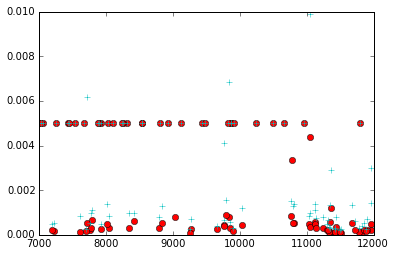

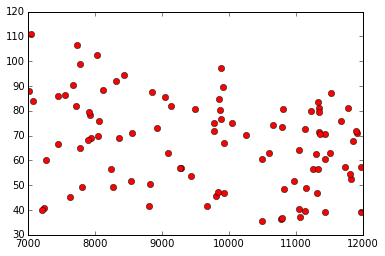

In [11]:
# batchsizeは関係無い 速さ的に１0500
plt.plot([ex[10] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[10] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0., 0.01)
plt.figure()
plt.plot([ex[10] for ex in ex_list], [ex[3] for ex in ex_list], 'ro')

plt.figure()

(0, 0.01)

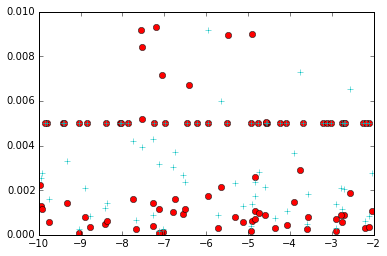

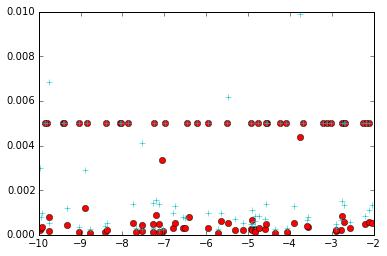

In [14]:
# l2 doesnt effects at all 
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[11] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)

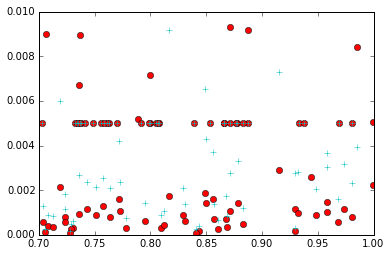

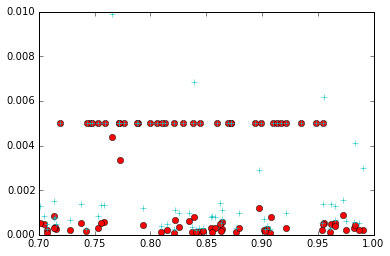

In [16]:
# dropout やっぱ0.8くらい
plt.plot([ex[12][0] for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([ex[12][0] for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()
plt.plot([ex[12][1] for ex in ex_list], [ex[8] for ex in ex_list], 'ro')
plt.plot([ex[12][1] for ex in ex_list], [ex[9] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()

(0, 0.01)

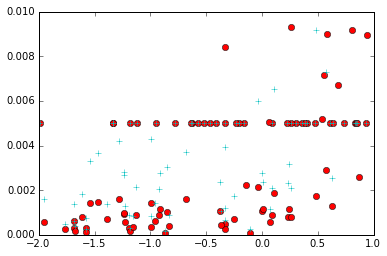

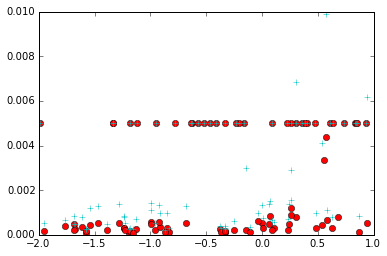

In [17]:
# gamma_scale 敏感すぎ 0.1
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[13] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)

(0, 0.01)

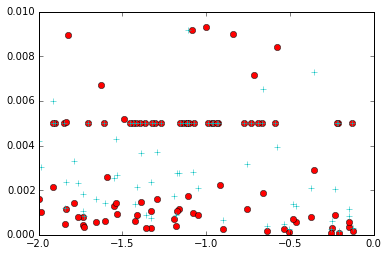

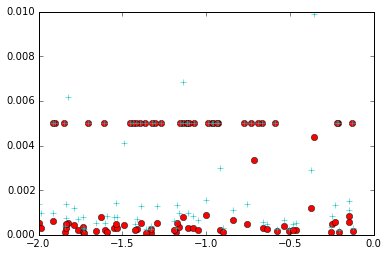

In [19]:
# bias_scale 0.1
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[6] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.figure()
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[8] for ex in ex_list], 'ro')
plt.plot(np.log10([ex[14] for ex in ex_list]), [ex[9] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)

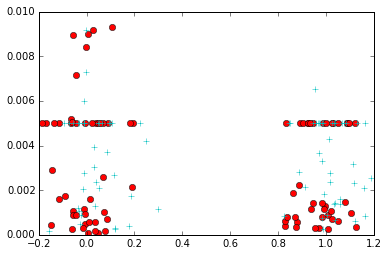

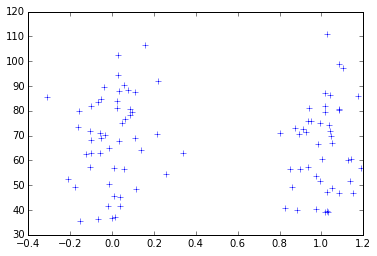

In [22]:
# relu is slitely better
plt.plot([int(ex[15] == ['relu', 'relu'])+0.1*np.random.randn() for ex in ex_list], [ex[6] for ex in ex_list], 'ro')
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[7] for ex in ex_list], 'c+')
plt.ylim(0, 0.01)
plt.xlim(-0.2, 1.2)
plt.figure()
plt.plot([int(ex[15] == ['relu', 'relu']) +0.1*np.random.randn() for ex in ex_list], [ex[3] for ex in ex_list], '+')
